In [22]:
import datetime
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

df = pd.DataFrame()
print (df)

Empty DataFrame
Columns: []
Index: []


In [23]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

data = pd.read_csv('newdata.csv', parse_dates=['Date'])
data

,Date,Open
0,2014-01-28,1783.000000
1,2014-01-29,1790.150024
2,2014-01-30,1777.170044
3,2014-01-31,1790.880005
4,2014-02-03,1782.680054
5,2014-02-04,1743.819946
6,2014-02-05,1753.380005
7,2014-02-06,1752.989990
8,2014-02-07,1776.010010
9,2014-02-10,1796.199951


In [24]:
print (data.dtypes)

Date    datetime64[ns]
Open           float64
dtype: object


In [25]:
data['Date']=pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index(['Date'], inplace=True)

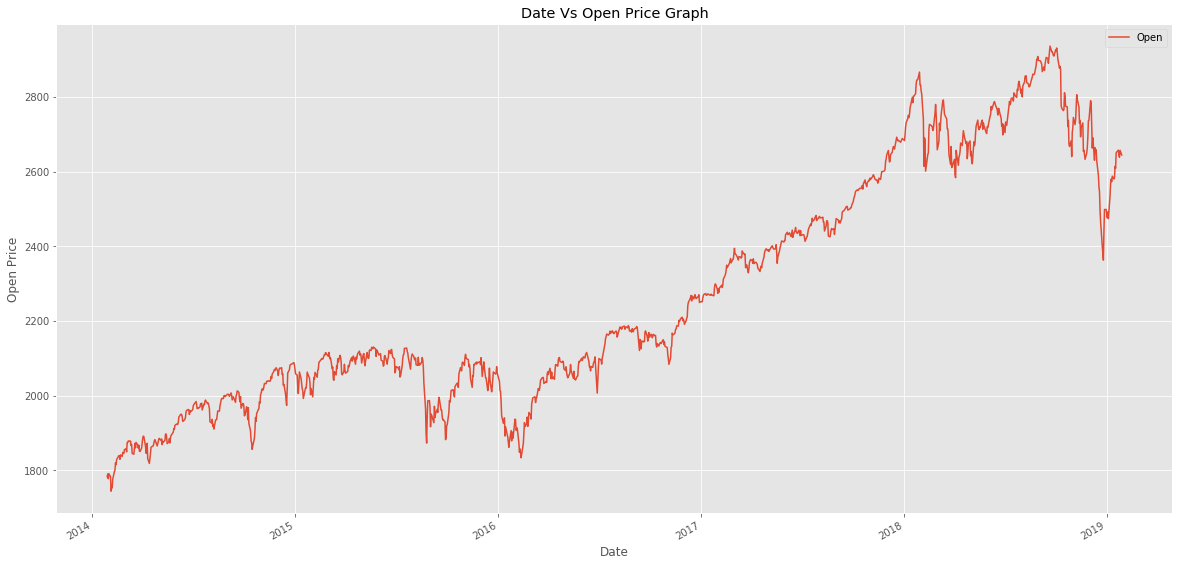

In [26]:
data.plot()
plt.title('Date Vs Open Price Graph')
plt.ylabel('Open Price')
plt.xlabel('Date')
plt.show()

In [27]:
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
train_data = data['1/28/2014':'12/10/2018']
test_data = data['12/13/2018':'1/28/2019']

In [8]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            print('except')

In [9]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 10138.973475203631 for model SARIMAX(3, 1, 1)x(3, 1, 1, 12)


In [10]:

# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

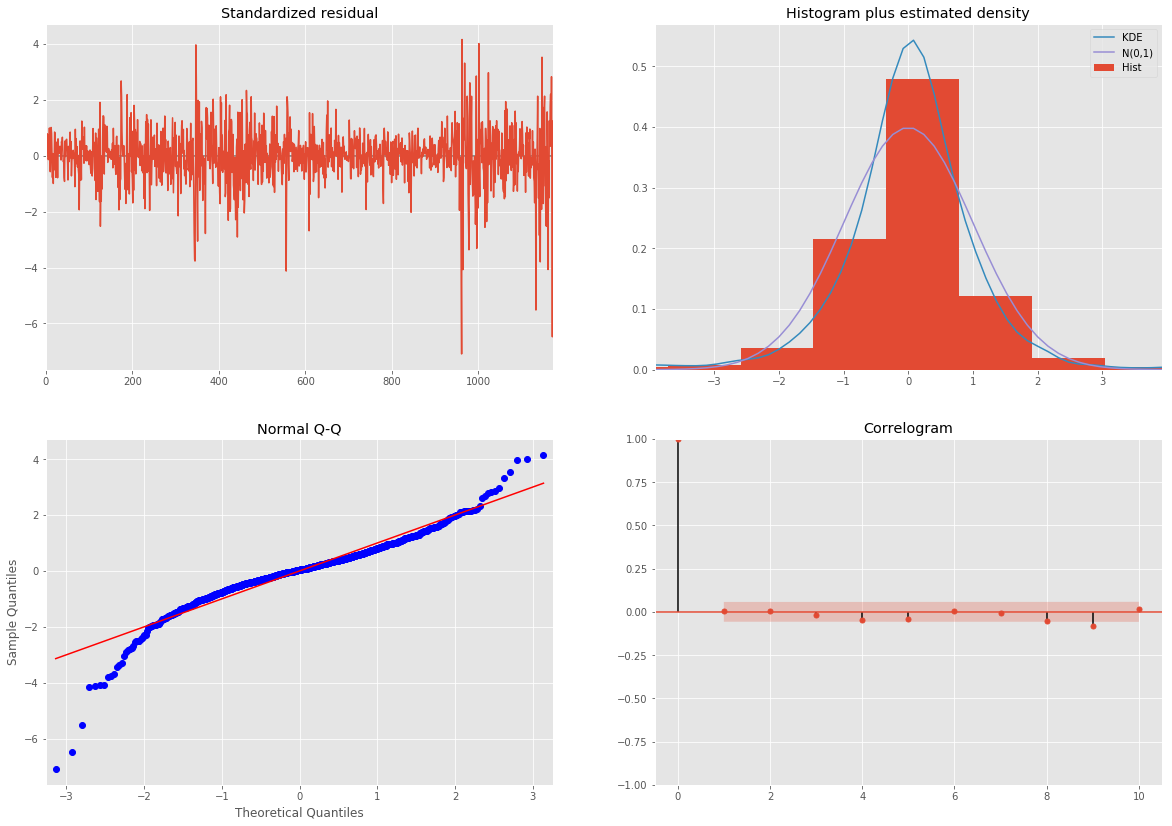

In [30]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [50]:
pred0 = results.get_prediction(start=948, dynamic=False)
pred0_ci = pred0.conf_int()
pred0_ci


,lower Open,upper Open
Date,,
2017-10-31,2541.348368,2610.891769
2017-11-01,2541.651656,2611.194983
2017-11-02,2550.487018,2620.029477
2017-11-03,2545.367614,2614.908692
2017-11-06,2545.623671,2615.164320
2017-11-07,2554.332929,2623.873449
2017-11-08,2561.343663,2630.884144
2017-11-09,2554.547193,2624.087664
2017-11-10,2549.912115,2619.452582


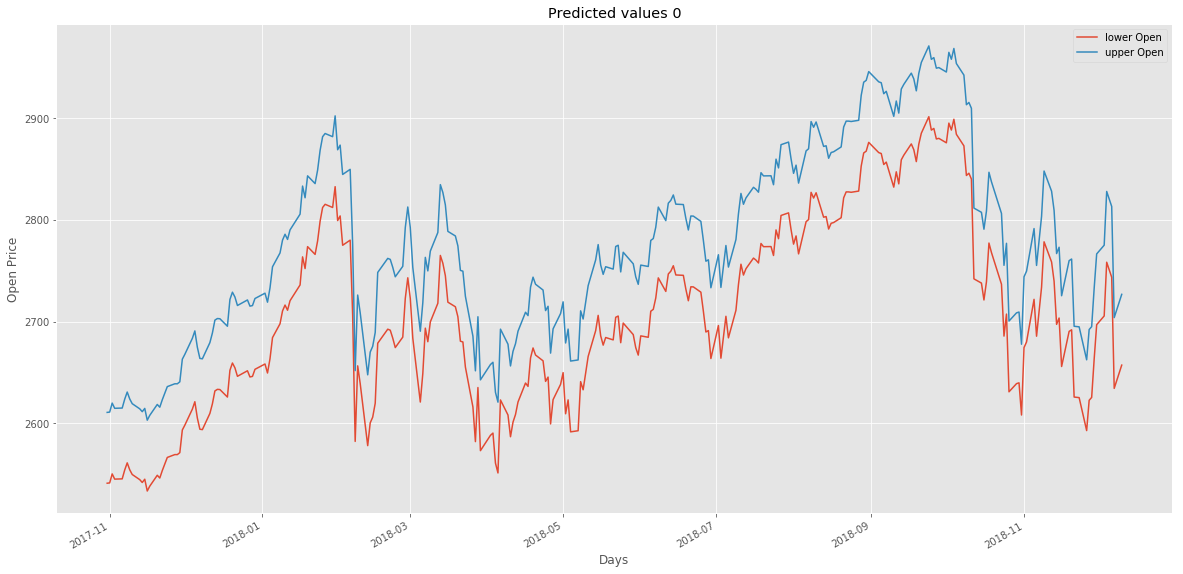

In [55]:
pred0_ci.plot()
plt.title('Predicted values 0')
plt.ylabel('Open Price')
plt.xlabel('Days')
plt.show()

In [51]:
pred1 = results.get_prediction(start=948, dynamic=True)
pred1_ci = pred1.conf_int()
pred1_ci

,lower Open,upper Open
Date,,
2017-10-31,2541.348368,2610.891769
2017-11-01,2526.954983,2626.156302
2017-11-02,2518.343229,2638.620204
2017-11-03,2508.748869,2650.328555
2017-11-06,2497.831521,2656.340799
2017-11-07,2492.366895,2666.753519
2017-11-08,2488.757129,2677.630522
2017-11-09,2482.465188,2684.713725
2017-11-10,2476.668186,2691.537396


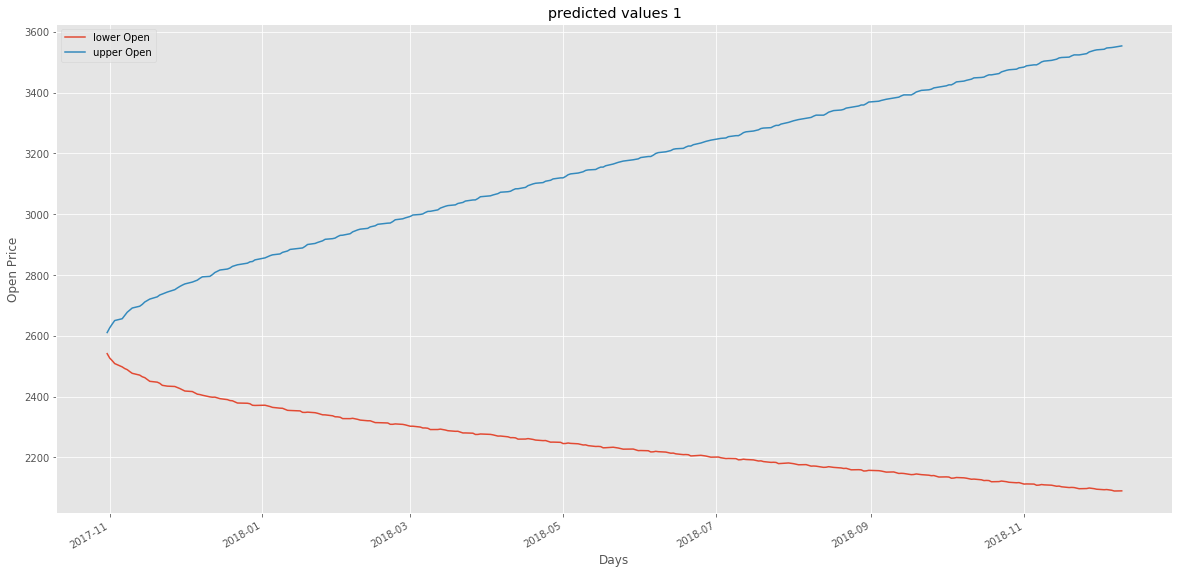

In [56]:
pred1_ci.plot()
plt.title('predicted values 1')
plt.ylabel('Open Price')
plt.xlabel('Days')
plt.show()

In [47]:
pred2 = results.get_forecast(1259)
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean[1229:1258])

2456    3299.888166
2457    3296.713779
2458    3298.720853
2459    3297.200637
2460    3295.908894
2461    3298.536148
2462    3299.398101
2463    3301.603436
2464    3301.391353
2465    3302.189181
2466    3302.408710
2467    3305.117152
2468    3306.404735
2469    3303.230348
2470    3305.237422
2471    3303.717206
2472    3302.425463
2473    3305.052717
2474    3305.914670
2475    3308.120005
2476    3307.907923
2477    3308.705750
2478    3308.925279
2479    3311.633721
2480    3312.921304
2481    3309.746917
2482    3311.753991
2483    3310.233775
2484    3308.942032
dtype: float64


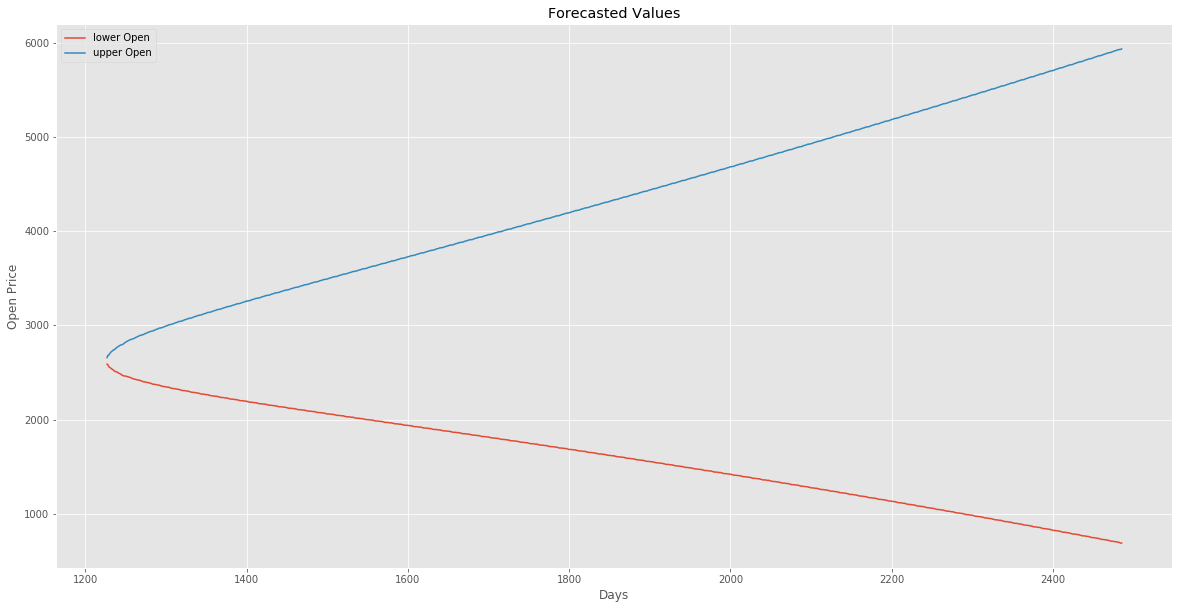

In [57]:
pred2_ci.plot()
plt.title('Forecasted Values')
plt.ylabel('Open Price')
plt.xlabel('Days')
plt.show()

In [48]:
ax = data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Open Price')
plt.xlabel('Date')
plt.legend()
plt.show()

ValueError: view limit minimum -35566.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x06207B28> (for post_execute):


ValueError: view limit minimum -35566.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -35566.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x1152 with 1 Axes>

In [49]:
prediction = pred2.predicted_mean[1229:1258].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the forecast of year 1960 is {:.2f}%'.format(MAPE))

ValueError: operands could not be broadcast together with shapes (30,) (29,) 